In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [99]:
vgsales = pd.read_csv('/Users/OpeyemiAyodele/Desktop/vgsales.csv')

In [100]:
vgsales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [101]:
vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [102]:
vgsales.shape

(16598, 11)

In [103]:
duplicate_rows_vgsales = vgsales[vgsales.duplicated()]
print(duplicate_rows_vgsales.shape)

(0, 11)


In [104]:
#there are no duplicated rows

In [105]:
print(vgsales.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [106]:
df = vgsales.dropna() 
df.count()

Rank            16291
Name            16291
Platform        16291
Year            16291
Genre           16291
Publisher       16291
NA_Sales        16291
EU_Sales        16291
JP_Sales        16291
Other_Sales     16291
Global_Sales    16291
dtype: int64

In [107]:
# I dropped null rows

In [108]:
# im double checking to make sure there is no more nulls
print(df.isnull().sum()) 

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [109]:
# yes, they are all removed

In [110]:
# now I'm checking for outliers in different columns

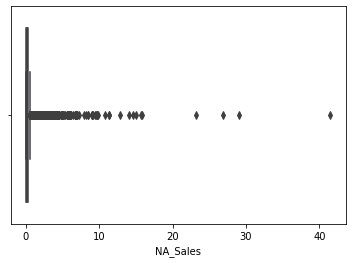

In [111]:
sns.boxplot(x= df['NA_Sales'])

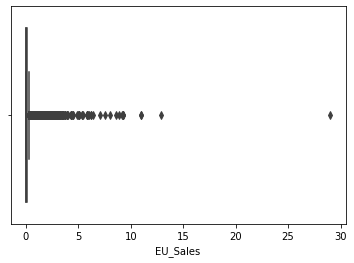

In [112]:
sns.boxplot(x= df['EU_Sales'])

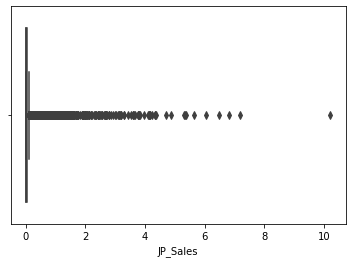

In [113]:
sns.boxplot(x= df['JP_Sales'])

In [114]:
# interquartile range info
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rank            8307.00
Year               7.00
NA_Sales           0.24
EU_Sales           0.11
JP_Sales           0.04
Other_Sales        0.04
Global_Sales       0.42
dtype: float64


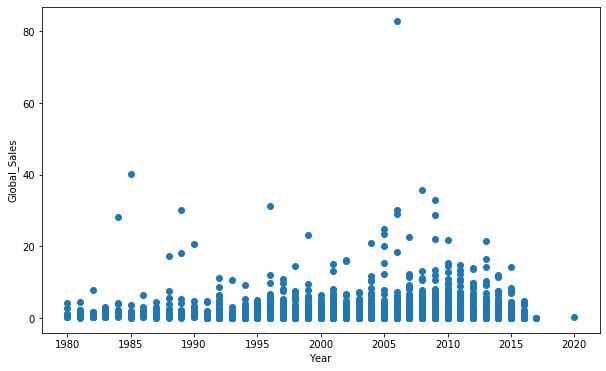

In [115]:
# scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Year'], df['Global_Sales'])
ax.set_xlabel('Year')
ax.set_ylabel('Global_Sales')
plt.show()

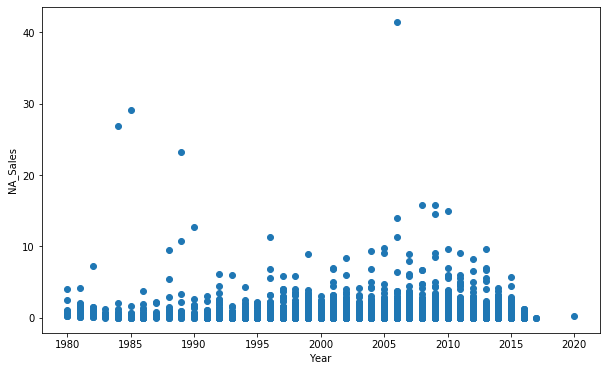

In [116]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Year'], df['NA_Sales'])
ax.set_xlabel('Year')
ax.set_ylabel('NA_Sales')
plt.show()

In [117]:
#Regression

In [130]:
df.head(50)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,age
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,31.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,7.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,20.0
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,27.0
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,10.0
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,10.0
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,7.0
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,32.0


In [119]:
df['age'] = 2016- df['Year']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,age
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,31.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,7.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,20.0


In [121]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [127]:
formula = 'Global_Sales ~ age + C(Genre) + C(Publisher) + C(Platform)'

In [128]:
train, test = statsmodels_train_test_split(df)

In [129]:
model = smf.ols(formula = formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     3.801
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.60e-163
Time:                        11:56:44   Log-Likelihood:                -20194.
No. Observations:               12218   AIC:                         4.153e+04
Df Residuals:                   11646   BIC:                         4.577e+04
Df Model:                         571                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -0.6644      0.793     -0.838      0.402      -2.219       0.890
C(Genre)[T.Adventure]                                     -0.1640      0.057     -2.875      0.004      -0.276      -0.052
C(Genre)[T.Fighting]                                       0.0528      0.063      0.839      0.401      -0.071       0.176
C(Genre)[T.Misc]                                          -0.1321      0.049     -2.714      0.007      -0.228      -0.037
C(Genre)[T.Platform]                                       0.2299      0.060      3.822      0.000       0.112       0.348
C(Genre)[T.Puzzle]                                        -0.2602      0.076     -3.436      0.001      -0.409      -0.112
C(Genre)[T.Racing]                                        -0.0441      0.055     -0.808      0.419      -0.151       0.063
C(Genre)[T.Role-Playing]                                   0.0918      0.053      1.735      0.083      -0.012       0.195
C(Genre)[T.Shooter]                                        0.1547      0.052      2.986      0.003       0.053       0.256
C(Genre)[T.Simulation]                                    -0.0320      0.063     -0.511      0.610      -0.155       0.091
C(Genre)[T.Sports]                                        -0.1473      0.045     -3.272      0.001      -0.236      -0.059
C(Genre)[T.Strategy]                                      -0.2534      0.069     -3.681      0.000      -0.388      -0.118
C(Publisher)[T.1C Company]                                 0.1357      1.059      0.128      0.898      -1.940       2.212
C(Publisher)[T.20th Century Fox Video Games]              -0.1541      1.073     -0.144      0.886      -2.257       1.949
C(Publisher)[T.2D Boy]                                     0.2479      1.497      0.166      0.868      -2.686       3.182
C(Publisher)[T.3DO]                                       -0.0993      0.788     -0.126      0.900      -1.644       1.445
C(Publisher)[T.505 Games]                                 -0.0482      0.756     -0.064      0.949      -1.530       1.433
C(Publisher)[T.5pb]                                       -0.1400      0.777     -0.180      0.857      -1.662       1.382
C(Publisher)[T.7G//AMES]                                  -0.0892      1.183     -0.075      0.940      -2.408       2.229
C(Publisher)[T.989 Sports]                                 0.0990      1.496      0.066      0.947      -2.834       3.032
C(Publisher)[T.989 Studios]                                0.6348      0.866      0.733      0.464      -1.063       2.332
C(Publisher)[T.AQ Interactive]                             0.0977      1.058      0.092      0.926      -1.977       2.172
C(Publis

In [131]:
# After notes + Meeting

In [134]:
formula2 = 'NA_Sales ~ age + C(Genre) + C(Publisher) + C(Platform)'
train, test = statsmodels_train_test_split(df)
model = smf.ols(formula = formula2, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     3.344
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          1.27e-126
Time:                        07:19:01   Log-Likelihood:                -13126.
No. Observations:               12218   AIC:                         2.737e+04
Df Residuals:                   11657   BIC:                         3.153e+04
Df Model:                         560                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -0.2182      0.534     -0.408      0.683      -1.265       0.829
C(Genre)[T.Adventure]                                     -0.0787      0.032     -2.464      0.014      -0.141      -0.016
C(Genre)[T.Fighting]                                       0.0661      0.035      1.884      0.060      -0.003       0.135
C(Genre)[T.Misc]                                          -0.0341      0.027     -1.249      0.212      -0.088       0.019
C(Genre)[T.Platform]                                       0.1541      0.034      4.558      0.000       0.088       0.220
C(Genre)[T.Puzzle]                                        -0.0715      0.042     -1.718      0.086      -0.153       0.010
C(Genre)[T.Racing]                                        -0.0022      0.031     -0.072      0.943      -0.062       0.058
C(Genre)[T.Role-Playing]                                   0.0231      0.030      0.768      0.442      -0.036       0.082
C(Genre)[T.Shooter]                                        0.1235      0.029      4.206      0.000       0.066       0.181
C(Genre)[T.Simulation]                                    -0.0363      0.035     -1.038      0.299      -0.105       0.032
C(Genre)[T.Sports]                                        -0.0591      0.025     -2.337      0.019      -0.109      -0.010
C(Genre)[T.Strategy]                                      -0.1186      0.038     -3.094      0.002      -0.194      -0.043
C(Publisher)[T.1C Company]                                 0.1020      0.664      0.154      0.878      -1.199       1.403
C(Publisher)[T.20th Century Fox Video Games]              -0.4360      0.637     -0.685      0.493      -1.684       0.812
C(Publisher)[T.3DO]                                       -0.0667      0.534     -0.125      0.901      -1.114       0.981
C(Publisher)[T.49Games]                                   -0.2930      0.889     -0.329      0.742      -2.037       1.450
C(Publisher)[T.505 Games]                                 -0.0025      0.517     -0.005      0.996      -1.016       1.011
C(Publisher)[T.5pb]                                       -0.0766      0.525     -0.146      0.884      -1.107       0.953
C(Publisher)[T.7G//AMES]                                  -0.0829      0.629     -0.132      0.895      -1.316       1.150
C(Publisher)[T.989 Sports]                                 0.0544      0.890      0.061      0.951      -1.689       1.798
C(Publisher)[T.989 Studios]                                0.3871      0.569      0.680      0.496      -0.728       1.502
C(Publisher)[T.AQ Interactive]                            -0.0321      0.608     -0.053      0.958      -1.224       1.159
C(Publis

In [136]:
formula3 = 'EU_Sales ~ age + C(Genre) + C(Publisher) + C(Platform)'
train, test = statsmodels_train_test_split(df)
model = smf.ols(formula = formula3, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               EU_Sales   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     2.856
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.34e-91
Time:                        07:19:41   Log-Likelihood:                -7012.6
No. Observations:               12218   AIC:                         1.515e+04
Df Residuals:                   11657   BIC:                         1.930e+04
Df Model:                         560                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -0.3302      0.450     -0.734      0.463      -1.212       0.552
C(Genre)[T.Adventure]                                     -0.0516      0.019     -2.666      0.008      -0.090      -0.014
C(Genre)[T.Fighting]                                      -0.0073      0.021     -0.349      0.727      -0.049       0.034
C(Genre)[T.Misc]                                          -0.0486      0.017     -2.938      0.003      -0.081      -0.016
C(Genre)[T.Platform]                                       0.0623      0.021      3.036      0.002       0.022       0.103
C(Genre)[T.Puzzle]                                        -0.0585      0.025     -2.296      0.022      -0.109      -0.009
C(Genre)[T.Racing]                                         0.0227      0.019      1.222      0.222      -0.014       0.059
C(Genre)[T.Role-Playing]                                  -0.0124      0.018     -0.687      0.492      -0.048       0.023
C(Genre)[T.Shooter]                                        0.0669      0.018      3.787      0.000       0.032       0.102
C(Genre)[T.Simulation]                                    -0.0144      0.021     -0.676      0.499      -0.056       0.027
C(Genre)[T.Sports]                                        -0.0472      0.015     -3.084      0.002      -0.077      -0.017
C(Genre)[T.Strategy]                                      -0.0695      0.024     -2.955      0.003      -0.116      -0.023
C(Publisher)[T.1C Company]                                -0.0320      0.540     -0.059      0.953      -1.090       1.026
C(Publisher)[T.20th Century Fox Video Games]               0.0004      0.496      0.001      0.999      -0.972       0.973
C(Publisher)[T.2D Boy]                                    -0.0257      0.622     -0.041      0.967      -1.246       1.194
C(Publisher)[T.3DO]                                       -0.0410      0.450     -0.091      0.927      -0.923       0.841
C(Publisher)[T.49Games]                                   -0.0827      0.623     -0.133      0.894      -1.303       1.138
C(Publisher)[T.505 Games]                                 -0.0557      0.442     -0.126      0.900      -0.922       0.810
C(Publisher)[T.5pb]                                       -0.0916      0.445     -0.206      0.837      -0.964       0.781
C(Publisher)[T.7G//AMES]                                  -0.0517      0.492     -0.105      0.916      -1.016       0.913
C(Publisher)[T.989 Sports]                                 0.0380      0.623      0.061      0.951      -1.183       1.259
C(Publisher)[T.989 Studios]                                0.0197      0.460      0.043      0.966      -0.883       0.922
C(Publis